# Assignment 6 (Oct 26)

Today's topics are:
1. Conda Environments 
2. Package installation
3. Basic Markov-chain Monte Carlo (MCMC) 

There are many MCMC samplers in python, we are only going to go through one today, `PyMC3`.
See this nice article [Samplers demo](https://mattpitkin.github.io/samplers-demo/) by Matthew Pitkin where he demos 13 popular samplers in python.

## Readings (optional)

If you find this week's material new or challenging, you may want to read through some or all the following resources while working on your assignment:

**Conda Environments**:

* [SPIRL: 5.2. Conda environments](https://cjtu.github.io/spirl/anaconda_environments.html)
* [Conda official page: Managing environments](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html)

**MCMC**:

* [MCMC: A (very) Beginnner’s Guide](https://prappleizer.github.io/Tutorials/MCMC/MCMC_Tutorial.html)
* [MCMC sampling for dummies](https://twiecki.io/blog/2015/11/10/mcmc-sampling/)
* [Markov Chain Monte Carlo (MCMC)](https://people.duke.edu/~ccc14/sta-663/MCMC.html)
  
**YouTube Videos (highly recommended)**:

* [Markov Chain Monte Carlo (MCMC): Data Science Concepts](https://www.youtube.com/watch?v=yApmR-c_hKU)
* [Metropolis - Hastings: Data Science Concepts](https://www.youtube.com/watch?v=yCv2N7wGDCw)


## Managing Conda Environments 

At the start of the term, we installed **Anaconda** which gave us access to Python and some popular Python packages. While Anaconda comes with several useful packages by default, we can also install brand new packages with a few simple commands. Once we're all `conda` wizards, we'll have the wealth of open source Python code at our fingertips!

### Why Environments

By default when we open a terminal after installing **Anaconda**, we should see `(base)` at the left, indicating that we are in the default `conda` environment.

```{note}
To open a terminal in VS Code, type `CTRL SHIFT ~` (Mac: `CTRL SHIFT ~`) or in the top bar go to `View -> Terminal`.
```

Terminology:

- **Anaconda**: the program we installed that comes with `conda` and a bunch of packages
- `conda`: the command line tool that helps us manage our Python packages and environments
- `base`: the name of the default `conda` environment

This `base` environment is where Anaconda keeps all of its default programs and inner workings, so it's recommended to *never install packages to `base` directly*. Instead, we want to make a new **environment**.

Having different `conda` environments allows us to tailor the packages we are using to each of our projects. Sometimes we will need `astropy`, sometimes we will need `pandas`. Sometimes we need neither! Today, we'll need a package called `pymc3` which is very specific to MCMC analysis.

The reason we don't want all of these packages in `base` is that they may have incompatible prerequisites (also called *dependency conflicts*). For example:

- `package1` can only run on `python v2.7`
- `package2` needs at least `python v3.9`

Since we can only have 1 version of Python at a time, if we try to install both of these packages, one is guaranteed to not work correctly!

Instead, we can install each package to its own `conda` **environment**. We can even get different versions of Python working on the same computer in only a couple steps!

### Working with Environments

In this section, we will use the terminal. These commands are also available through the user friendly [Anaconda Navigator](https://docs.anaconda.com/anaconda/navigator/getting-started/#navigator-managing-environments) GUI if you prefer to use that instead.

A summary of the most important conda commands is below (we abbreviate environment as env):

| Command | Description |
| - | - |
| `conda list` | List all packages and their versions in current env |
| `conda list \| grep pkg` | Search for pkg in current env and show its version |
| `conda install pkg1 pkg2 ...` | Install pkg 1, pkg 2, ... with `conda` in current env (see installing below) |
| `conda env list` | Show all environments and their locations (file paths) |
| `conda create -n env-name` | Create a new env called *env-name* |
| `conda create -n env-name python=3.X pkg1 pkg2 ...` | Create a new env with python v3.X and install pkg1, pkg2, ... |
| `conda activate env-name` | Activate *env-name* (running Python from this terminal will use packages in this env) |
| `conda deactivate` | Deactivate the current env (takes you to your previous env, usually `base`) |
| `conda remove --name env-name --all` | Delete an environment and all packages in it |
| `conda env export > environment.yml` | Create a file with all packages in current env (use to reproduce env on same machine) |
| `conda env export --from-history > environment.yml` | Create a file with only packages you installed in current env (use to reproduce env on different machines) |
| `conda env create -f environment.yml` | Re-build an env from an environment.yml file (see previous 2 commands) |


### [Hands-on] 5 mins

Type the following commands into a terminal as an interactive tour of the main `conda` commands 

You will create, activate and install packages into a new `conda` environment. You will then save the environment to an `environment.yml` file, delete the environment, and re-build it from your `environment.yml`!

```bash
# We want to use a package called seaborn. Let's see if it's installed in base
conda list | grep seaborn

# Create Python 3.7 env with seaborn package v0.8 (type "y" then Enter)
conda create -n new-env python=3.7 seaborn=0.8

# List all envs (you should see new-env among them)
conda env list

# Activate our env
conda activate new-env

# Check that we have seaborn v0.8 installed now
conda list | grep seaborn

# We also want a package called bokeh (v2.1). Let's install it here
conda install bokeh=2.1

# Check that bokeh v2.1 is also installed
conda list | grep bokeh

# Export our environment to an environment.yml file so we can rebuild it later
conda env export > environment.yml

# Check to see we have an environment.yml file now
ls environment.yml

# Deactivate our environment
conda deactivate

# Check if we have seaborn v0.8 installed here (blank means no)
conda list | grep seaborn

# Delete our env and all packages in it (type "y" then Enter)
conda remove --name new-env --all

# List all envs again (new-env should be gone)
conda env list

# Check if we have access to seaborn and bokeh now :(
conda list | grep seaborn
conda list | grep bokeh

# Re-create our env from the file we saved
conda env create -f environment.yml

# List all envs again (new-env is back in town)
conda env list

# Activate our resurrected new-env
conda activate new-env

# Check that we can access seaborn and bokeh again!
conda list | grep seaborn
conda list | grep bokeh

# All done! You can remove this test env by following the same steps as before
conda deactivate
conda remove --name new-env --all

# You can also remove the environment.yml file
rm environment.yml
```

The above steps show that with only a few commands, we can have completely separate Python environments happily co-existing on our computers.

Even if you only ever use 1 environment, it is **very important** to export an `environment.yml` periodically so that if your computer dies or `conda` breaks, you can always reinstall the exact environment you were using to run your code. 

If you want to share this environment file with your collaborators, make sure to use the `--from-history` flag (see table above). This makes it more likely the env will be installable on other machines and that `conda` won't install OS-specific packages on the wrong operating system.

### Conda Tips

Some common pitfalls, gotchas, and tips to remember with `conda`:

- Make sure to activate the desired environment each time you open a new terminal
- It doesn't matter what directory you run `conda` commands from:
  - Activating an env activates it for the whole terminal even if you switch directories
  - 1 exception: if you are loading/saving an `environment.yml`, you need to be in same directory (or give the full path)
- Before uninstalling Anaconda, make sure to save `environment.yml` files for each environment you want to restore later
- If you re-install a new version of Anaconda, you can load `environment.yml` files saved with older versions
- Update Anaconda periodically with the below commands (see [Anaconda versions](https://repo.anaconda.com/archive/) and choose the most recent):

```
conda update conda
conda install anaconda=VersionNumber
```

## Installing New Packages

Now that we know how to make a new `conda` environment, it's important to know that `conda` isn't the only way to install Python packages (in fact sometimes we need to use other ways). 

The three ways to install new Python packages are:

1. Run `conda install pkg`
2. Run `pip install pkg`
3. Install from **source file** directly (we will talk about this in week 9!)

It's important to carefully read the documentation of a new package to see what the preferred installation method is - this can prevent errors and headaches down the line! This is particularly important for the package we are using today, `pymc3`, which has different installation instructions for different operating systems.

### Installing with conda / conda-forge

We already talked about how to install packages with `conda`, but there are a couple more things to know. 

When we run `conda install`, the `conda` command checks a list of packages maintained by the Anaconda team and will install it and all of its dependencies once it makes sure there are no conflicts. 

To check if a package exists and is installable with `conda`, we can use the `conda search` command.

```
# Try this in the terminal!
conda search seaborn=0.8
```

If anything shows up, we can just switch the `conda search` to `conda install` and we have a new package (pending dependency checks)! 

But what if we try searching a package like [batman](https://lweb.cfa.harvard.edu/~lkreidberg/batman/)?

```
# Try this in the terminal!
conda search batman=1.9
```

All hope is not lost! In addition to the main Anaconda list of packages, there is also a community-driven list of packages that has rapidly grown much larger than any one team can maintain. This list is called `conda-forge` and we can access it with the **channel** or `-c` option. 

```
# Try this in the terminal!
conda search -c conda-forge batman=1.9
```

Now this indicates we need to do `conda install -c conda-forge batman=1.9` to install the package from `conda-forge` (e.g., plain old `conda install batman=1.9` won't work). 

### Installing with pip

If a package you want to install isn't in the default or conda-forge channels, you may be able to install it with `pip`, short for "Python Install Package". This is the original way to install packages in Python, but does not handle dependencies and dependency conflicts as well as `conda`. 

As a general rule, using `conda` whenever possible and `pip` *only when necessary* will cut down on errors when working with Python packages.

The `pip` command installs from the [Python Package Index](https://pypi.org/) (PyPI or [Cheese Shop](https://www.youtube.com/watch?v=Hz1JWzyvv8A&ab_channel=AndrewBoynton) for short).

For example `pip install numpy` will install NumPy, but since NumPy is available from conda, we should always prefer `conda install numpy`.

```{note}
Just like `conda install`, `pip install` will install to the currently active environment. Remember to activate your environment before installing packages!
```

## Installing PyMC3 and Corner

Now that we know the basics of environments and installing packages, we're ready to install the packages needed for this assignment!

### Install PyMC3

Remember: always **read the documentation** to learn the best way of installing a package. The Markov-Chain Monte Carlo package, [PyMC3 documentation](https://docs.pymc.io/en/stable/) has different installation instructions depending on your OS, so read the instructions carefully before running any commands.

The basic structure of the command will be to create a new `conda` env, pulling from the `conda-forge` channel as we learned above.

```bash
# Check docs for the full command for your machine!
conda install -c conda-forge pymc3 ...
```

Beyond this, the packages to use and python version required may differ on Linux, Mac (M1 CPU), Mac (Intel CPU), and Windows, so please consult the installation instructions in the official [PyMC3 documentation](https://docs.pymc.io/en/stable/)

Once you have installed `pymc3`, you will need to activate the environment:

`conda activate pymc3`

Then, we will install 2 additional packages, `astropy` which you've seen before and `ipykernel` which will allow us to use this environment in Jupyter notebooks, e.g. the one you're reading now!

`conda install astropy ipykernel`

### Install Corner

If we go to the official [Corner documentation](https://corner.readthedocs.io/en/latest/index.html) and head to the installation page, we will see a recommendation to install with `conda`, but a command that says to use `pip`. We can always check if `corner` is available from `conda` with:

```bash
# Try this in the terminal!
conda search corner
conda search -c conda-forge corner
```

It looks like it is available from `conda-forge` (which we should usually prefer over `pip`)! 

Make sure you are in the `pymc3` environment (should be in parentheses in your terminal, if not `conda activate pymc3`, then go ahead and install `corner` with:

`conda install -c conda-forge corner`


## Activating a new environment in VS Code

Finally, we're ready to get going with PyMC3 and Corner, we just need to tell VS Code about our new environment. To do so:

1. Reload VS Code with **CTRL+SHIFT+P** (Mac: **CMD+SHIFT+P**) -> Type "Reload window" + **ENTER**
2. Set workspace Python env with **CTRL+SHIFT+P** (Mac: **CMD+SHIFT+P**) -> Type "Select Python Interpreter" + **ENTER** and choose `pymc3` from the list
3. Also set the Jupyter notebook kernel to `pymc3` with upper right button (should say **Select Kernel** or **Python 3.X...**)
4. Run the below cell to see if it worked! If not let us know!


In [1]:
import pymc3 as pm
import corner
print(f"Running on PyMC3 v{pm.__version__}")
print(f"Running on corner v{corner.__version__}")

Running on PyMC3 v3.11.2
Running on corner v2.2.1


## Markov-chain Monte Carlo (MCMC)

The **Markov-chain Monte Carlo (MCMC)** technique offers us a way to explore the possible parameters of a model fit to some data. Unlike ordinary linear regression which can be solved directly, MCMC uses Bayesian stats and random sampling to build up confidence in model fits that are too complicated or have too many parameters to simply solve by fitting a curve.

The basic idea of MCMC is:

- We have an equation or *model* we want to fit to some data
  - This model may have many parameters, or complicated non-linear functions of some parameters (yuck)
- We also start with some *prior* knowledge about these model parameters 
  - Maybe we know the max/min value they can be, or a range each parameter usually falls in
- MCMC will vary the parameters in a *random but smart* way (using some math we'll mostly gloss over - see optional readings for more info!)

Then, if the data can be fit by the model *and* we had well constrained priors for the parameters *and* we let MCMC run long enough *and* we re-ran MCMC enough times independently, then something cool happens:

- MCMC will find the zones in parameter space that make the model best fit the data
- We will get a statistical average and $\pm$ uncertainty for all parameters simultaneously
- We can get precise fits to data we couldn't fit any other way (except trial & error)!

This technique is great for models with many parameters or sneaky local minima that can look like the best fit while hiding even better fit parameters. MCMC allows us to fit a whole set of parameters simultaneously so that we can avoid simplifying assumptions that weaken our model.

### How does it work?

Mostly Bayes' theorem and magic... but we can give a sense for how MCMC works without going too deep (see readings/videos for *lots* more info).

As the name suggests, MCMC is a combination of **Markov chain** and **Monte Carlo** methods that explore the possible parameters of our fit in many dimensions. A *Markov chain* is a series of events that only look at the current state (e.g., position in parameter space) to determine the next state. The *Monte Carlo* aspect is that at each position in parameter space, we move in a random direction to a new position (new set of parameters to try). Together, this amounts to a [random walk](https://en.wikipedia.org/wiki/Random_walk) (usually called a **walker**) through our parameters that will build up an erratic pattern over time:


![Random Walk Wikipedia](https://upload.wikimedia.org/wikipedia/commons/7/7c/Random_walk_2500.svg)


The clever part is that even though our **walker** picks a random direction to move at each step, sometimes *it just stays put*. Our **walker** friend typically only moves if doing so gives us parameters that better fit our data (with some leeway). There are several algorithms for deciding whether to move our walker or not but those are outside the scope of this lesson. What's important is that our walker will *sample* our parameter space over time, and (hopefully) *converge* to a set of parameters that make our model fit our data. 

The below [gif by M. Joseph](https://blog.revolutionanalytics.com/2013/09/an-animated-peek-into-the-workings-of-bayesian-statistics.html) shows how walkers can start in random parts of parameter space (here only 2 parameters, *mu* and *sigma*), then eventually converge via an MCMC random walk to a set of parameters that best fit the data. We know we're at the best fit parameters when the *posterior distribution* is 1 nice peak (we'll talk about what that means later!).

![MCMC gif](https://raw.githubusercontent.com/cjtu/spirl/master/spirl/images/mcmc.gif)

Since many models have *local minima* in parameter space, which could make a bad fit look good (essentially getting a walker stuck in a poorly fitting zone in parameter space), we generally run multiple walkers to see where most of them end up. If most of our walkers converge to a particular zone in parameter space, we can be more confident that this zone gives us our best fitting parameters. 

## Simple Example with MCMC -- Finding Planet Mass and Radius

Let's return to our trusty free-fall gravity example. Recall we measured the height (**z**) of an object over time on some planet with unknown gravity. Previously we used curve fitting techniques to get the gravitational acceleration (**g**) with the equation:

$$z(t) = \frac{1}{2}gt^2$$

However, what if we want to know something about the planet mass (**M**) and planet Radius (**R**)? Pulling out the old Physics I textbook, we can use the definition of **g** and $F=ma$ to get:

$$g = \frac{GM}{R^2}$$

Now we can write height (**z**) in terms of **M**, **R**, **t**, and the universal gravitational constant (**G** = 6.674 $\times 10^{-11} m^3/kg/s^2$)

$$z(t,M,R) = \frac{1}{2}\frac{GM}{R^2}t^2$$

Now we have an expression with 4 variables (z, t, m, R), but we've only measured 2 (z and t). It seems hopeless to solve for our 2 unknowns, **M** and **R**, with normal algebra... in fact there are an infinite number of possible values we can plug in to make the above equation work...

Luckily, we know a little bit about planet masses and radii! For one, neither can be negative. Also, there are maximum values a planet mass / radius can have before it becomes a different object entirely. While this may not seem like much, these are **priors**, knowledge we have about our unknown parameters. To use our priors to inform the most likely M and R, we need one more concept: Bayes' Theorem.

### Bayes' Theorem

The Bayes Theorem tells us about probabilities *given some condition* or *given prior knowledge*. A simplified form of the Theorem is:

$$P(x|y) \propto P(y|x) \cdot P(x)$$

Where $P(x|y)$ means "the probability of x given that we know y", conversely $P(y|x)$ means "the probability of y given that we know x" and $P(x)$ is just the probability that event $x$ occurs. We can translate Bayes' theorem to MCMC speak where these 3 terms have different names but the same form:

$${\rm posterior probability} \propto ({\rm likelihood\ function}) \cdot ({\rm prior})$$

Because this is a lot of stats and jargon that we don't have time to dive deep on, we'll use a short story to help us build intuition for Bayes' theorem:

> One afternoon, you and your friend Lauren are talking about Bayes’ theorem when your brother, Ben, comes out of his room. You both notice that Ben is wearing a Yankees cap and an old worn-out T-shirt with a Yankees logo. Lauren says, "based on Ben's outfit, I bet he's going to a Yankees game!" You reply, "Ah, so based on your **prior** experience of people wearing matching caps and T-shirts to Yankees games, your Bayesian intuition says there is a high **probability** he is going to a baseball game”. 
> 
> Lauren thinks for a second and then says, “Oh I get it! If I had to guess, I'd say there's about an 80\% chance that people are **wearing a Yankees cap and T-shirt** *given* they are **going to a Yankees game**. This would be our **likelihood function**, *P(y|x)*. So then my **prior** is how likely it is that Ben is **going to a Yankees game**, *P(x)*. Well, the Yankees are playing in town today and I know that Ben has season tickets so I'd say my **prior** is Ben has a 95\% chance of going to the game today. So when I multiply my **likelihood function** by my **prior**, I get my **posterior probability** of Ben **going to a Yankees game** *given* he is **wearing a Yankees cap and T-shirt**, which is 80\% times 95\%, so **76\%!**." Ben rolls his eyes, grabs his keys and leaves, wondering why anyone would ruin a perfectly good Saturday talking about stats...
>
> You reply, "Nice! That's well reasoned based on your priors and Bayes' Theorem. But as Ben’s sister, I know for a fact he is going on a date with his partner and not to a ball game.” 
> 
> Lauren was skeptical of your certainty. “How could you possibly know that?” 
> 
> You eagerly reply, “Well, I agree on the **likelihood function** that 80\% of people wear matching caps and T-shirts given they are going to a Yankees game. BUT my **priors** are that
> 1) Ben got that shirt as a gift from his partner for their first-year anniversary, 
> 2) Ben only wears that shirt when he sees his partner,
> 3) Ben's partner hates baseball. 
> 
> Therefore, from my **priors**, I'd guess Ben has only a 1\% chance of going to a Yankees game with his partner today. Therefore, my **posterior probability** that Ben is going to a baseball game given his outfit is 80\% times 1\%, **less than 1\%!**! So you see, having less informed priors can have a huge effect on your Bayesian prediction!"


In the coming weeks we'll learn more about the **likelihood function** and **posterior probability**, but some MCMC packages like **PyMC3** will handle those for us in simple cases as long as we have a model, data, and priors. Today our main focus is going to be on running an MCMC analysis and choosing good **priors**!

### Prior probability / Prior functions:

Our **prior** knowledge of the unknown parameters can be very important for having MCMC converge to the correct final parameters. Priors in MCMC analyses are defined as *probability distributions*. The two most commonly used prior distributions are the **uniform** and **normal** distributions.

The **uniform prior**, $\mathcal{U}(lower,upper)$, is the simpler of the two. If the sampled parameter is in the range `(lower, upper)`, the prior's probability is 1, otherwise the probability is 0. 

For example, say we set our Mass (M) prior to $\mathcal{U}(0, 1)$ kg. This means that if means that if your walker goes to a part of parameter space where M=2 kg, the prior probability will be 0 and therefore our **posterior probability** will also be 0. The uniform prior puts a hard range on a parameter, but every value in that range is equally likely.

The **normal (Gaussian) prior**, assigns a bell-curve probability to a parameter with peak probability near the mean and lower probability with increasing standard deviations from the mean:

$$p(x) = \frac{1}{\sqrt{2\pi \sigma^2}}exp\left( -\frac{(x-\mu)^2}{2\sigma^2} \right)$$

For example, assuming we measure M with some uncertainty as $0.50\pm0.1$ kg, we can set a Gaussian prior with $\mu=0.5, \sigma=0.1$. Walkers nearer to 0.5 will have a higher **prior probability**, but the walkers will still explore lower probability space further from the mean.

There is also a combination of the above two priors, sometimes called a **truncated normal prior**. This is a Gaussian prior with $\mu$ and $\sigma$, except we can also set a lower or upper bound, beyond which the probability is 0. 

For example, since we know mass (M) cannot be negative, we could use the same mean and sigma as the previous example as $\mu=0.5, \sigma=0.1$, but also set $lower=0$ to make sure we don't get any fits with negative mass.

## MCMC with PyMC3

Finally know all we need to start building MCMC models in Python! To get started with `pymc3`, we only need a couple components: **data**, a **model**, and **priors**. Then we just need to tweak some MCMC parameters and PyMC3 will do all the random walking for us!

The main steps are:

1. Create a `pymc3.model()` instance
2. Setup our PyMC3 object with **priors**, **model**, and **observed data**
3. Run `.sample()` to make the walkers explore parameter space!

### Using MCMC to learn mass and radius from Free-fall!

Recall: We want to estimate the planet mass (M) and radius (R) using this model:

$$z(t) = \frac{1}{2}\frac{GM}{R^2}t^2$$

We have free-fall data (**z**, **t**), and we do have some extra (prior) knowledge on M and R. 

* When recording the free-fall height over time, we managed to measure the mass to some precision as M=$0.30\pm0.015$ Jupiter masses. We also know we can't have a negative mass. Therefore, we can use a truncated normal distribution prior for M.
* For R, we only know that it cannot be larger than 2 Jupiter radius, and cannot have be negative value. Therefore, we can use a uniform distribution with an upper and lower bound
* Our model can also be defined with a probability distribution, here we have well-behaved errors on our data points, so we will use a normal distribution for our model

For our priors and model, we will use the following 3 probability distributions provided by PyMC3 (which we alias to `pm`):

- `pm.Uniform()`
- `pm.Normal()`
- `pm.TruncatedNormal()`

You can find all built-in distributions at [PyMC3 Distributions](https://docs.pymc.io/en/stable/api/distributions/continuous.html#pymc3.distributions).

### Read in data

We will read in a free-fall data set from this [link](https://raw.githubusercontent.com/cjtu/spirl/master/spirl/data/position_measurement.csv).

In [2]:
import arviz as az
import pandas as pd
import pymc3 as pm
import corner
import matplotlib.pyplot as plt

# See plt styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('ggplot')

# read in data
f = "https://raw.githubusercontent.com/cjtu/spirl/master/spirl/data/position_measurement.csv"
df = pd.read_csv(f)
df.head()

,time(s),z(m),z_err(m)
0,0.05,0.013114,0.001400
1,0.06,0.022205,0.001962
2,0.07,0.025082,0.002617
3,0.08,0.035259,0.003368
4,0.09,0.042766,0.004213


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


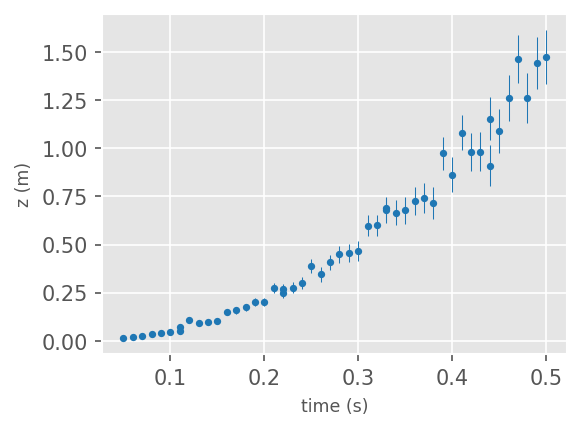

In [3]:
# plot the data
f = plt.figure(facecolor='white', figsize=(4,3), dpi=150 )
ax1 = plt.subplot(111)

ax1.errorbar(df['time(s)'], df['z(m)'], yerr = df['z_err(m)'], ms=5, lw=0.5, 
             fmt='.', color='tab:blue')
ax1.set_xlabel('time (s)', size='small', fontname='Helvetica')
ax1.set_ylabel('z (m)', size='small', fontname='Helvetica')
plt.show()

In [4]:
import astropy.units as u
from astropy import constants as const

Mj2si = const.M_jup.si.value # constant to transfer Jupiter mass to kg
Rj2si = const.R_jup.si.value # constant to transfer Jupiter radius to m
G_cgs = const.G.si.value 

t = df['time(s)'].to_numpy()
z = df['z(m)'].to_numpy() 
z_err = df['z_err(m)'].to_numpy()

In [5]:
# 1) Initialize PyMC3 model object
planet_model = pm.Model()

def free_fall(t, m, r, G=G_cgs):
    """
    Model (likelihood) function for a free-falling object.

    Parameters
    ----------
    t : array_like
        Time array.
    m : float
        Mass of object in kg.
    r : float
        Radius of object in m.
    G : float
        Gravitational constant in m^3 / kg / s^2.
    """
    return 0.5 * (G * m / r**2) * t**2

# Set up the PyMC3 object with its prior and likelihood functions
with planet_model:
    # Priors for unknown model parameters
    # TruncatedNormal prior to make sure mass > 0 Jupiter masses
    mass_j = pm.TruncatedNormal('mass_j', mu=0.3, sd=0.015, lower=0) 
    # Uniform prior for radius, Make sure 0 < R < 2 Jupiter masses
    radius_j = pm.Uniform('radius_j', lower=0, upper=2) 
    
    # Convert to SI units
    mass_si = Mj2si * mass_j
    radius_si = Rj2si * radius_j
    
    # Expected value of outcome, aka "the model"
    z_model = free_fall(t, mass_si, radius_si, G_cgs)

    # Gaussian likelihood (sampling distribution) of observations
    # Passing z to the "observed" arg makes PyMC3 recognize this as the model to fit
    obs = pm.Normal('obs', mu=z_model, sd=z_err, observed=z)
    
    # No need to setup the posterior function as PyMC3 does it for you!

### Run the MCMC!

In [6]:
# Setup number of CPUs to use (won't effect result, only the run time)
cpus = 4
# Setup number of walkers
walkers = 4 
# Setup number of steps each walkers walk
Nsamples = 1000

# Do the sampling (let your walkers walk! MCMC! Woohoo!)
with planet_model:
    trace = pm.sample(Nsamples, chains=walkers, cores=cpus)

/tmp/ipykernel_16764/2167632412.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(Nsamples, chains=walkers, cores=cpus)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [radius_j, mass_j]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.
The number of effective samples is smaller than 25% for some parameters.


### Explore the results

After the sampling is done, your walker's travel history (parameters they stepped on per step) is saved under `trace`. You can access the travel history of each of you walker's steps on different parameters by `trace['par name']`...

In [7]:
trace['mass_j']

array([0.28389524, 0.2866226 , 0.30959293, ..., 0.29864788, 0.31566691,
       0.31405673])

But a more intuitive way to view the `trace` is to use `arviz` pkg.

ArviZ is a Python package for exploratory analysis of Bayesian models. Includes functions for posterior analysis, data storage, sample diagnostics, model checking, and comparison.

(from [ArviZ](https://arviz-devs.github.io/arviz/) site)

On the left of the plot show the marginalized posterior probability distributions of each of your unknown parameters. On the right, are panels for each unknown parameters showing your walker's travel histories.

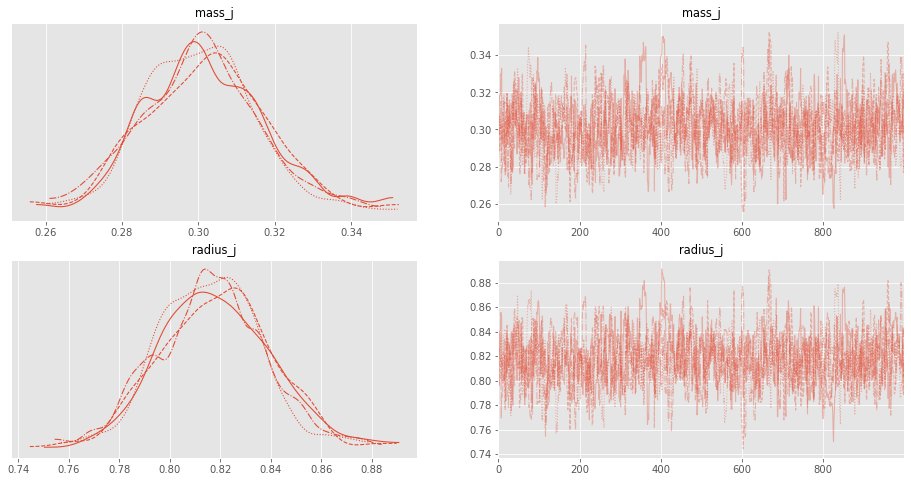

In [8]:
with planet_model:
    az.plot_trace(trace, figsize=(16, 8))

You can use the `ArviZ`'s `summary` function to show `trace`'s statistical results.
This is done by the `pandas describe` function in the backend; thus, you can save it out and use it later! 

In [9]:
with planet_model:
    df = az.summary(trace, round_to=2)
df.head()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mass_j,0.30,0.02,0.27,0.33,0.0,0.0,641.59,685.56,1.0
radius_j,0.82,0.02,0.78,0.86,0.0,0.0,647.70,671.44,1.0


### Plot parameters with Corner

Finally, plotting the corner plot!

In a corner plot, the counter plots at the lower left are showing the posterior distribution between two of your fitting parameters. The more circular (more 2D gaussian shape) the counter plots are, the nicer you fitting results are! The histograms on top of them are the marginalized posterior probability distributions of each the unknown parameters, i.e., their probability distributions. 

And you can see that MCMC do help us recover the correct answer to M and R (the location of the blue lines)!
Wonderful! 

```{note}
We add "true" values as blue lines here, but we don't generally know the true values. In this toy example, we include true values to see how close MCMC got to our parameters.
```

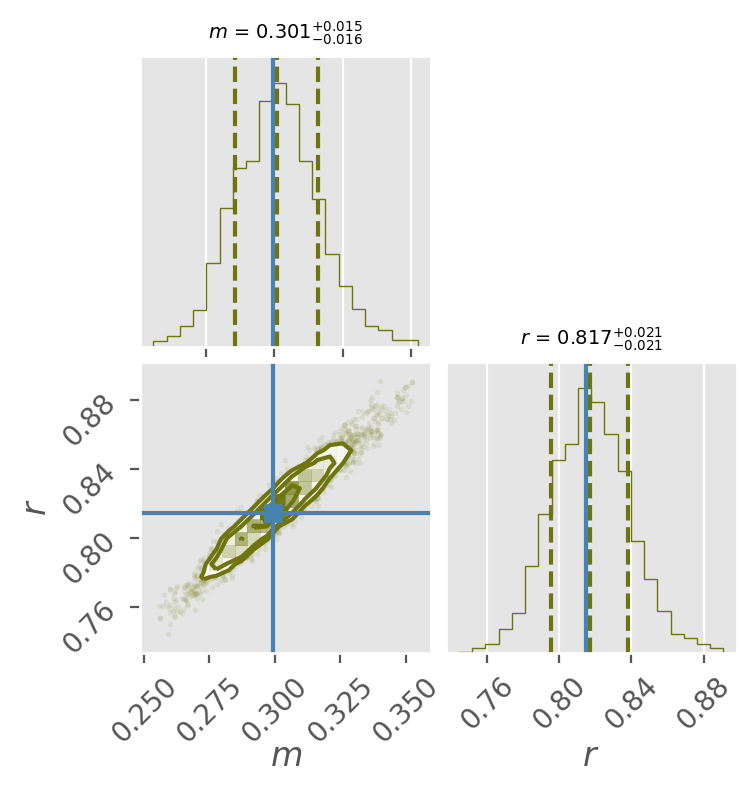

In [10]:
# True values of M and R, which is from the Saturn.
true_R = (58232*u.km).to(u.R_jup).value
true_M = (5.6834e26*u.kg).to(u.M_jup).value
with planet_model:
    f, ax = plt.subplots(2, 2, figsize=(4, 4), facecolor='white', dpi=200, gridspec_kw={'hspace': .05, 'wspace': 0.05})
    fig = corner.corner(trace, quantiles=[0.16, 0.5, 0.84],
                        show_titles=True, color='xkcd:olive',
                        labels=[r"$m$", r"$r$"], title_kwargs={'size':7}, title_fmt='1.3f',
                        truths=dict(mass_j=true_M, radius_j=true_R),
                        fig=f)

## [Assignment] -- Finding Planet Mass and Radius by choosing good priors!

In this assignment, we will repeat the MCMC analysis above, but explore how **priors** can change our results. 

You will get a different set of free-fall data ([link](https://raw.githubusercontent.com/cjtu/spirl/master/spirl/data/position_measurement_as.csv)) to fit for the planet R and M with the same model:

$$z(t) = \frac{1}{2}\frac{GM}{R^2}t^2$$

In each question you will set up the same model as before, but try different priors for R and M:

1. Both with a uniform priors (the worst constraints).
2. Uniform prior for M, and Gaussian prior for R.
3. Both with a Gaussian priors (the best constraints).

The true values of M and R for this data set are:
```python
true_R = (25559*u.km).to(u.R_jup).value
true_M = (8.6810E25*u.kg).to(u.M_jup).value
```

Like before, include these values as blue lines in the final corner plots to see how close your MCMC results are.

Tips: 

1. If your resulting corner plot looks weird, try to increase the steps rather than number of walkers (you shouldn't need more than 4 walkers!).
2. If you already have your steps (`Nsamples`) > 1e6, but don't see any difference in results, it's ok to call it quits - which question did this happen for? Why do you think it didn't converge?

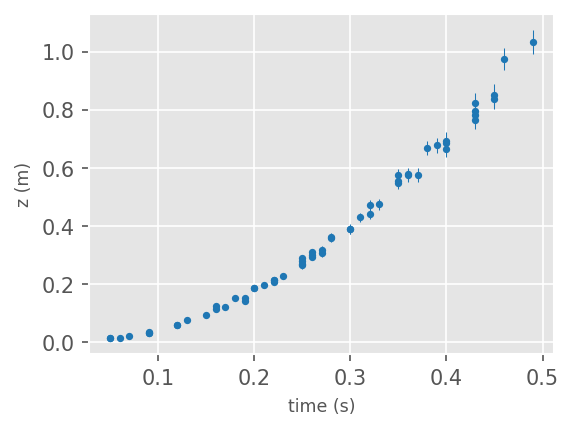

In [11]:
# read in data
f = "https://raw.githubusercontent.com/cjtu/spirl/master/spirl/data/position_measurement_as.csv"
df = pd.read_csv(f)

# plot the data
f = plt.figure(facecolor='white', figsize=(4,3), dpi=150 )
ax1 = plt.subplot(111)

ax1.errorbar(df['time(s)'], df['z(m)'], yerr = df['z_err(m)'], fmt = '.', ms=5, 
             lw=0.5, color='tab:blue')
ax1.set_xlabel('time (s)',    size='small', fontname='Helvetica')
ax1.set_ylabel('z (m)', size='small', fontname='Helvetica')
plt.show()

In [12]:
Mj2si = const.M_jup.si.value # constant to transfer Jupiter mass to kg
Rj2si = const.R_jup.si.value # constant to transfer Jupiter radius to m
G_cgs = const.G.si.value 

t = df['time(s)'].to_numpy()
z = df['z(m)'].to_numpy() 
z_err = df['z_err(m)'].to_numpy()

### 1. Both with uniform priors:

* Prior for M: $\mathcal{U}(0, 0.1)$
* Prior for R: $\mathcal{U}(0, 1.0)$

Please show both the walker history plot and the corner plot.

In [13]:
# [your code here]

### 2. Gaussian prior for M, and Uniform prior for R:

* Prior for M: $\mathcal{G}(0.045, 0.02)$
* Prior for R: $\mathcal{U}(0, 1)$

Hint: Can mass be negative? Can you account for this with your choice of prior distribution?

Please show both the walker history plot and the corner plot.

In [14]:
# [your code here]

### 3. Both with a Gaussian priors:

* Prior for M: $\mathcal{G}(0.045, 0.02)$
* Prior for R: $\mathcal{G}(0.357, 0.05)$

Hint: Can mass or radius be negative? Can you account for this with your choice of prior distribution?

Please show both the walker history plot and the corner plot.

In [15]:
# [your code here]

### 4. What did we learn about **priors**?

In your Pull Request description, write a sentence or two explaining in your words what you learned about **priors** in this assignment.